In [10]:
library(tidyverse)#load tidyverse libraries
library(tidyr) #tidy messy data
library(readxl)#read excel files
library(readr) #read rectangular text data 
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings
library(stringr) # to hand strings
library(rvest) # rvest makes scraping easier
library(data.table)#data.table data types and data handling
library(ggplot2)#declaratively creating graphics

library(xml2) # makes it easier to work with HTML and XML from R

 **Comments: Read the number of excel files of livestock before and after the covid-19 outbreak respectively**

In [11]:
livestock_2020 <- read_excel('agricultural-production-statistics-june-2021-final.xlsx',sheet=2) #Read the data about livestock after there is a outbreak
livestock_2018 <- read_excel('2019.xlsx',sheet=2) #Read the data about livestock before is a outbreak

New names:
* `` -> `...2`
* `` -> `...3`
* `` -> `...4`
* `` -> `...5`
* `` -> `...6`
* `` -> `...7`
* `` -> `...8`
* `` -> `...9`
* `` -> `...10`
* `` -> `...11`
* `` -> `...12`
* `` -> `...13`
* `` -> `...14`
New names:
* `` -> `...2`
* `` -> `...3`
* `` -> `...4`
* `` -> `...5`
* `` -> `...6`
* `` -> `...7`
* `` -> `...8`
* `` -> `...9`
* `` -> `...10`
* `` -> `...11`
* `` -> `...12`
* `` -> `...13`
* `` -> `...14`


In [12]:
livestock_2020 #show the livestock data table from 2020-2021
livestock_2018 #show the livestock data table from 2018-2019
# class(livestock)


Table 1,...2,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Selected livestock numbers(1)(2)(3),NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
By region,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Region,NA,At 30 June,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Total sheep,NA,NA,Total dairy cattle,NA,NA,Total beef cattle,NA,NA,Total deer,NA,NA
NA,NA,2020,2021,% change,2020,2021,% change,2020,2021,% change,2020,2021,% change
NA,NA,(000),NA,NA,(000),NA,NA,(000),NA,NA,(000),NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Northland,NA,236,240,1.8,311,311,-0.2,378,361,-4.4000000000000004,S,S,S


Table 1,...2,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Selected livestock numbers(1)(2)(3),NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
By region,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Region,NA,At 30 June,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Total sheep,NA,NA,Total dairy cattle,NA,NA,Total beef cattle,NA,NA,Total deer,NA,NA
NA,NA,2018,2019,% change,2018,2019,% change,2018,2019,% change,2018,2019,% change
NA,NA,(000),NA,NA,(000),NA,NA,(000),NA,NA,(000),NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Northland,NA,280,278,-0.6,367,335,-8.9,400,382,-4.5999999999999996,4,S,S


 **Comments: As the imported data tables are a lot of garbage and NA, so the next step is data wrangling**

 **1. Rename column names for two tables**

In [13]:
colnames(livestock_2020) <- (c("district", "f1", "2020sheep", "2021sheep", "f2", "2020cow", "2021cow", "f3","2020beef","2021beef","f4","2020deer","2021deer","f5"))
colnames(livestock_2018) <- (c("district", "f1", "2018sheep", "2019sheep", "f2", "2018cow", "2019cow", "f3","2018beef","2019beef","f4","2018deer","2019deer","f5"))

In [14]:
livestock_2020
livestock_2018

district,f1,2020sheep,2021sheep,f2,2020cow,2021cow,f3,2020beef,2021beef,f4,2020deer,2021deer,f5
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Selected livestock numbers(1)(2)(3),NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
By region,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Region,NA,At 30 June,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Total sheep,NA,NA,Total dairy cattle,NA,NA,Total beef cattle,NA,NA,Total deer,NA,NA
NA,NA,2020,2021,% change,2020,2021,% change,2020,2021,% change,2020,2021,% change
NA,NA,(000),NA,NA,(000),NA,NA,(000),NA,NA,(000),NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Northland,NA,236,240,1.8,311,311,-0.2,378,361,-4.4000000000000004,S,S,S


district,f1,2018sheep,2019sheep,f2,2018cow,2019cow,f3,2018beef,2019beef,f4,2018deer,2019deer,f5
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Selected livestock numbers(1)(2)(3),NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
By region,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Region,NA,At 30 June,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Total sheep,NA,NA,Total dairy cattle,NA,NA,Total beef cattle,NA,NA,Total deer,NA,NA
NA,NA,2018,2019,% change,2018,2019,% change,2018,2019,% change,2018,2019,% change
NA,NA,(000),NA,NA,(000),NA,NA,(000),NA,NA,(000),NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Northland,NA,280,278,-0.6,367,335,-8.9,400,382,-4.5999999999999996,4,S,S


In [15]:
# livestock%<>%select(-f1)
livestock_2020_1<- livestock_2020[-c(1:8),]
livestock_2020_1

livestock_2018_1<- livestock_2018[-c(1:8),]
livestock_2018_1


district,f1,2020sheep,2021sheep,f2,2020cow,2021cow,f3,2020beef,2021beef,f4,2020deer,2021deer,f5
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Northland,NA,236,240,1.8,311,311,-0.2,378,361,-4.4000000000000004,S,S,S
Auckland,NA,180,S,S,123,85,-31.2,113,125,10,S,6,S
Waikato,NA,1407,1540,9.5,1767,1810,2.5,540,622,15.2,70,64,-8.6
Bay of Plenty,NA,221,S,S,295,313,6.3,110,S,S,37,S,S
Gisborne,NA,1365,1446,5.9,S,10,S,250,261,4.5999999999999996,S,S,S
Hawke's Bay,NA,2530,2604,2.9,S,72,S,400,418,4.4000000000000004,67,60,-10.9
Taranaki,NA,388,442,14,555,538,-2.9,122,129,5.0999999999999996,3,2,-9.5
Manawat<U+016B>-Whanganui,NA,4681,4709,0.6,437,444,1.6,572,595,4,50,47,-4.8
Wellington,NA,1443,1291,-10.6,100,93,-7.7,152,154,1.2,S,S,S


district,f1,2018sheep,2019sheep,f2,2018cow,2019cow,f3,2018beef,2019beef,f4,2018deer,2019deer,f5
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Northland,NA,280,278,-0.6,367,335,-8.9,400,382,-4.5999999999999996,4,S,S
Auckland,NA,202,S,S,116,124,6.3,114,118,3.7,11,9,-21.1
Waikato,NA,1632,1524,-6.6,1814,1823,0.5,517,547,5.8,67,67,0.9
Bay of Plenty,NA,233,238,2.2000000000000002,307,318,3.6,96,107,10.9,37,S,S
Gisborne,NA,1457,1380,-5.3,S,S,S,261,254,-2.7,S,S,S
Hawke's Bay,NA,2851,2876,0.9,87,78,-10.6,429,449,4.7,56,61,8.5
Taranaki,NA,395,442,11.8,548,587,7.1,116,125,7.5,3,3,8.4
Manawat<U+016B>-Whanganui,NA,5060,4791,-5.3,486,468,-3.9,554,575,3.8,56,51,-8.9
Wellington,NA,1474,1434,-2.7,79,83,4.5999999999999996,132,150,13.8,S,8,S


In [16]:

livestock_2020_1 %<>% select(-f1,-f2,-f3,-f4,-f5)
livestock_2020_1

livestock_2018_1 %<>% select(-f1,-f2,-f3,-f4,-f5)
livestock_2018_1




district,2020sheep,2021sheep,2020cow,2021cow,2020beef,2021beef,2020deer,2021deer
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Northland,236,240,311,311,378,361,S,S
Auckland,180,S,123,85,113,125,S,6
Waikato,1407,1540,1767,1810,540,622,70,64
Bay of Plenty,221,S,295,313,110,S,37,S
Gisborne,1365,1446,S,10,250,261,S,S
Hawke's Bay,2530,2604,S,72,400,418,67,60
Taranaki,388,442,555,538,122,129,3,2
Manawat<U+016B>-Whanganui,4681,4709,437,444,572,595,50,47
Wellington,1443,1291,100,93,152,154,S,S


district,2018sheep,2019sheep,2018cow,2019cow,2018beef,2019beef,2018deer,2019deer
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Northland,280,278,367,335,400,382,4,S
Auckland,202,S,116,124,114,118,11,9
Waikato,1632,1524,1814,1823,517,547,67,67
Bay of Plenty,233,238,307,318,96,107,37,S
Gisborne,1457,1380,S,S,261,254,S,S
Hawke's Bay,2851,2876,87,78,429,449,56,61
Taranaki,395,442,548,587,116,125,3,3
Manawat<U+016B>-Whanganui,5060,4791,486,468,554,575,56,51
Wellington,1474,1434,79,83,132,150,S,8


In [17]:
livestock_2020_1 <- livestock_2020_1 %>% slice(1:20)
livestock_2020_1

livestock_2018_1 <- livestock_2018_1 %>% slice(1:20)
livestock_2018_1



district,2020sheep,2021sheep,2020cow,2021cow,2020beef,2021beef,2020deer,2021deer
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Northland,236,240,311,311,378,361,S,S
Auckland,180,S,123,85,113,125,S,6
Waikato,1407,1540,1767,1810,540,622,70,64
Bay of Plenty,221,S,295,313,110,S,37,S
Gisborne,1365,1446,S,10,250,261,S,S
Hawke's Bay,2530,2604,S,72,400,418,67,60
Taranaki,388,442,555,538,122,129,3,2
Manawat<U+016B>-Whanganui,4681,4709,437,444,572,595,50,47
Wellington,1443,1291,100,93,152,154,S,S


district,2018sheep,2019sheep,2018cow,2019cow,2018beef,2019beef,2018deer,2019deer
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Northland,280,278,367,335,400,382,4,S
Auckland,202,S,116,124,114,118,11,9
Waikato,1632,1524,1814,1823,517,547,67,67
Bay of Plenty,233,238,307,318,96,107,37,S
Gisborne,1457,1380,S,S,261,254,S,S
Hawke's Bay,2851,2876,87,78,429,449,56,61
Taranaki,395,442,548,587,116,125,3,3
Manawat<U+016B>-Whanganui,5060,4791,486,468,554,575,56,51
Wellington,1474,1434,79,83,132,150,S,8


In [18]:

livestock_2020_1$'2020sheep'[which(livestock_2020_1$'2020sheep' =='S')] <-'0'
livestock_2020_1$'2021sheep'[which(livestock_2020_1$'2021sheep' =='S')] <-'0'

livestock_2020_1$'2020cow'[which(livestock_2020_1$'2020cow' =='S'|livestock_2020_1$'2020cow' =='-'  )] <-'0'
livestock_2020_1$'2021cow'[which(livestock_2020_1$'2021cow' =='S'|livestock_2020_1$'2021cow' =='-'  )] <-'0'

livestock_2020_1$'2020beef'[which(livestock_2020_1$'2020beef' =='S'|livestock_2020_1$'2020beef' =='-')] <-'0'
livestock_2020_1$'2021beef'[which(livestock_2020_1$'2021beef' =='S'|livestock_2020_1$'2021beef' =='-')] <-'0'

livestock_2020_1$'2020beef'[which(livestock_2020_1$'2020beef' =='S'|livestock_2020_1$'2020beef' =='-')] <-'0'
livestock_2020_1$'2021beef'[which(livestock_2020_1$'2021beef' =='S'|livestock_2020_1$'2021beef' =='-')] <-'0'

livestock_2020_1$'2020deer'[which(livestock_2020_1$'2020deer' =='S'|livestock_2020_1$'2020deer' =='-')] <-'0'
livestock_2020_1$'2021deer'[which(livestock_2020_1$'2021deer' =='S'|livestock_2020_1$'2021deer' =='-')] <-'0'


livestock_2020_1



district,2020sheep,2021sheep,2020cow,2021cow,2020beef,2021beef,2020deer,2021deer
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Northland,236,240,311,311,378,361,0,0
Auckland,180,0,123,85,113,125,0,6
Waikato,1407,1540,1767,1810,540,622,70,64
Bay of Plenty,221,0,295,313,110,0,37,0
Gisborne,1365,1446,0,10,250,261,0,0
Hawke's Bay,2530,2604,0,72,400,418,67,60
Taranaki,388,442,555,538,122,129,3,2
Manawat<U+016B>-Whanganui,4681,4709,437,444,572,595,50,47
Wellington,1443,1291,100,93,152,154,0,0


In [19]:
livestock_2020_1$'2020sheep'<-as.numeric(livestock_2020_1$'2020sheep')
livestock_2020_1$'2021sheep'<-as.numeric(livestock_2020_1$'2021sheep')
livestock_2020_1$'2020cow'<-as.numeric(livestock_2020_1$'2020cow')
livestock_2020_1$'2021cow'<-as.numeric(livestock_2020_1$'2021cow')

livestock_2020_1$'2020beef'<-as.numeric(livestock_2020_1$'2020beef')
livestock_2020_1$'2021beef'<-as.numeric(livestock_2020_1$'2021beef')
livestock_2020_1$'2020deer'<-as.numeric(livestock_2020_1$'2020deer')
livestock_2020_1$'2021deer'<-as.numeric(livestock_2020_1$'2021deer')

livestock_2020_1



district,2020sheep,2021sheep,2020cow,2021cow,2020beef,2021beef,2020deer,2021deer
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Northland,236,240,311,311,378,361,0,0
Auckland,180,0,123,85,113,125,0,6
Waikato,1407,1540,1767,1810,540,622,70,64
Bay of Plenty,221,0,295,313,110,0,37,0
Gisborne,1365,1446,0,10,250,261,0,0
Hawke's Bay,2530,2604,0,72,400,418,67,60
Taranaki,388,442,555,538,122,129,3,2
Manawat<U+016B>-Whanganui,4681,4709,437,444,572,595,50,47
Wellington,1443,1291,100,93,152,154,0,0


In [20]:

livestock_2018_1$'2018sheep'[which(livestock_2018_1$'2018sheep' =='S')] <-'0'
livestock_2018_1$'2019sheep'[which(livestock_2018_1$'2019sheep' =='S')] <-'0'

livestock_2018_1$'2018cow'[which(livestock_2018_1$'2018cow' =='S'|livestock_2018_1$'2018cow' =='-'  )] <-'0'
livestock_2018_1$'2019cow'[which(livestock_2018_1$'2019cow' =='S'|livestock_2018_1$'2019cow' =='-'  )] <-'0'

livestock_2018_1$'2018beef'[which(livestock_2018_1$'2018beef' =='S'|livestock_2018_1$'2018beef' =='-')] <-'0'
livestock_2018_1$'2019beef'[which(livestock_2018_1$'2019beef' =='S'|livestock_2018_1$'2019beef' =='-')] <-'0'

livestock_2018_1$'2018beef'[which(livestock_2018_1$'2018beef' =='S'|livestock_2018_1$'2018beef' =='-')] <-'0'
livestock_2018_1$'2019beef'[which(livestock_2018_1$'2019beef' =='S'|livestock_2018_1$'2019beef' =='-')] <-'0'

livestock_2018_1$'2018deer'[which(livestock_2018_1$'2018deer' =='S'|livestock_2018_1$'2018deer' =='-')] <-'0'
livestock_2018_1$'2019deer'[which(livestock_2018_1$'2019deer' =='S'|livestock_2018_1$'2019deer' =='-')] <-'0'


livestock_2018_1



district,2018sheep,2019sheep,2018cow,2019cow,2018beef,2019beef,2018deer,2019deer
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Northland,280,278,367,335,400,382,4,0
Auckland,202,0,116,124,114,118,11,9
Waikato,1632,1524,1814,1823,517,547,67,67
Bay of Plenty,233,238,307,318,96,107,37,0
Gisborne,1457,1380,0,0,261,254,0,0
Hawke's Bay,2851,2876,87,78,429,449,56,61
Taranaki,395,442,548,587,116,125,3,3
Manawat<U+016B>-Whanganui,5060,4791,486,468,554,575,56,51
Wellington,1474,1434,79,83,132,150,0,8


In [21]:
livestock_2018_1$'2018sheep'<-as.numeric(livestock_2018_1$'2018sheep')
livestock_2018_1$'2019sheep'<-as.numeric(livestock_2018_1$'2019sheep')
livestock_2018_1$'2018cow'<-as.numeric(livestock_2018_1$'2018cow')
livestock_2018_1$'2019cow'<-as.numeric(livestock_2018_1$'2019cow')

livestock_2018_1$'2018beef'<-as.numeric(livestock_2018_1$'2018beef')
livestock_2018_1$'2019beef'<-as.numeric(livestock_2018_1$'2019beef')
livestock_2018_1$'2018deer'<-as.numeric(livestock_2018_1$'2018deer')
livestock_2018_1$'2019deer'<-as.numeric(livestock_2018_1$'2019deer')

livestock_2018_1



district,2018sheep,2019sheep,2018cow,2019cow,2018beef,2019beef,2018deer,2019deer
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Northland,280,278,367,335,400,382,4,0
Auckland,202,0,116,124,114,118,11,9
Waikato,1632,1524,1814,1823,517,547,67,67
Bay of Plenty,233,238,307,318,96,107,37,0
Gisborne,1457,1380,0,0,261,254,0,0
Hawke's Bay,2851,2876,87,78,429,449,56,61
Taranaki,395,442,548,587,116,125,3,3
Manawat<U+016B>-Whanganui,5060,4791,486,468,554,575,56,51
Wellington,1474,1434,79,83,132,150,0,8


In [22]:
data_sheep_before_covid <- livestock_2018_1[,c(1,2,3)]
data_sheep_before_covid <- data_sheep_before_covid %>% slice(-10,-19,-20)
colnames(data_sheep_before_covid) <- (c("district", "sheep2018","sheep2019"))
data_sheep_before_covid


district,sheep2018,sheep2019
<chr>,<dbl>,<dbl>
Northland,280,278
Auckland,202,0
Waikato,1632,1524
Bay of Plenty,233,238
Gisborne,1457,1380
Hawke's Bay,2851,2876
Taranaki,395,442
Manawat<U+016B>-Whanganui,5060,4791
Wellington,1474,1434


In [23]:

data_sheep_before_covid<-mutate(data_sheep_before_covid, number =sheep2018+sheep2019, period = "before_covid19") 
  

data_sheep_before_covid

district,sheep2018,sheep2019,number,period
<chr>,<dbl>,<dbl>,<dbl>,<chr>
Northland,280,278,558,before_covid19
Auckland,202,0,202,before_covid19
Waikato,1632,1524,3156,before_covid19
Bay of Plenty,233,238,471,before_covid19
Gisborne,1457,1380,2837,before_covid19
Hawke's Bay,2851,2876,5727,before_covid19
Taranaki,395,442,837,before_covid19
Manawat<U+016B>-Whanganui,5060,4791,9851,before_covid19
Wellington,1474,1434,2908,before_covid19


In [24]:
data_sheep_before_covid %<>% select(-sheep2018,-sheep2019)
data_sheep_before_covid



district,number,period
<chr>,<dbl>,<chr>
Northland,558,before_covid19
Auckland,202,before_covid19
Waikato,3156,before_covid19
Bay of Plenty,471,before_covid19
Gisborne,2837,before_covid19
Hawke's Bay,5727,before_covid19
Taranaki,837,before_covid19
Manawat<U+016B>-Whanganui,9851,before_covid19
Wellington,2908,before_covid19


In [25]:
data_sheep_after_covid <- livestock_2020_1[,c(1,2,3)] 
data_sheep_after_covid <- data_sheep_after_covid %>% slice(-10,-19,-20) 
colnames(data_sheep_after_covid) <- (c("district", "sheep2020","sheep2021")) 







data_sheep_after_covid

district,sheep2020,sheep2021
<chr>,<dbl>,<dbl>
Northland,236,240
Auckland,180,0
Waikato,1407,1540
Bay of Plenty,221,0
Gisborne,1365,1446
Hawke's Bay,2530,2604
Taranaki,388,442
Manawat<U+016B>-Whanganui,4681,4709
Wellington,1443,1291


In [26]:

data_sheep_after_covid<-mutate(data_sheep_after_covid, number =sheep2020+sheep2021, period = "after_covid19") %>%
  select(-sheep2020,-sheep2021)
data_sheep_after_covid

district,number,period
<chr>,<dbl>,<chr>
Northland,476,after_covid19
Auckland,180,after_covid19
Waikato,2947,after_covid19
Bay of Plenty,221,after_covid19
Gisborne,2811,after_covid19
Hawke's Bay,5134,after_covid19
Taranaki,830,after_covid19
Manawat<U+016B>-Whanganui,9390,after_covid19
Wellington,2734,after_covid19


In [27]:
compare_before_after_sheep =rbind(data_sheep_after_covid,data_sheep_before_covid)
compare_before_after_sheep

district,number,period
<chr>,<dbl>,<chr>
Northland,476,after_covid19
Auckland,180,after_covid19
Waikato,2947,after_covid19
Bay of Plenty,221,after_covid19
Gisborne,2811,after_covid19
Hawke's Bay,5134,after_covid19
Taranaki,830,after_covid19
Manawat<U+016B>-Whanganui,9390,after_covid19
Wellington,2734,after_covid19


In [28]:
options(repr.plot.width=15, repr.plot.height=8)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab

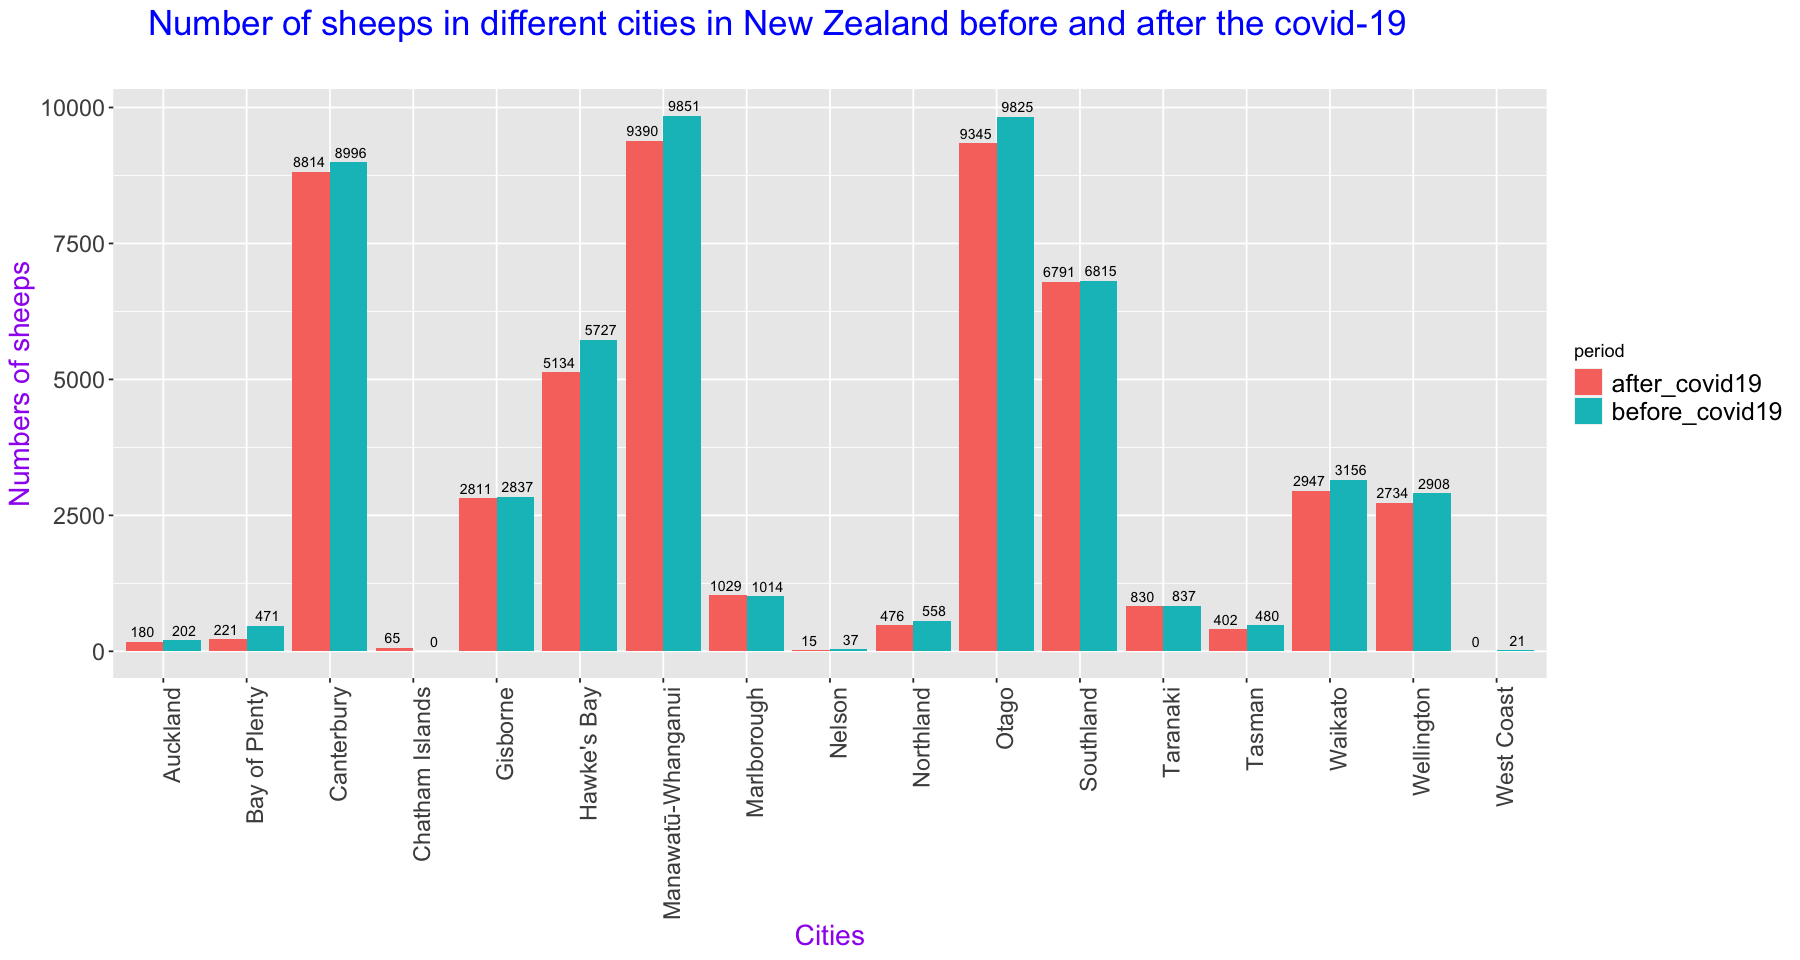

In [68]:
data_sheep_comp_graph <- ggplot(data =compare_before_after_sheep,
  mapping = aes(
    x = district, 
    y = number,
    fill = period))
data_sheep_comp_graph + geom_col(position = "dodge") + 
ggtitle("Number of sheeps in different cities in New Zealand before and after the covid-19
") + # title of the plot
geom_text(aes(label = number),position=position_dodge(width = 1),size = 3,vjust = -0.5)+
    theme(plot.title = element_text(size=21,hjust=0.2,color= "blue"), # set size of title
        axis.title = element_text(size=17,color = "purple"), # set size of x-axis and y-axis title
        axis.text.x = element_text(size=14,angle = 90, # set size of x-axis variable
        hjust = 1
        ),
        axis.text.y = element_text(size=14, # set size of x-axis variable
        hjust = 1
        ),
        legend.text = element_text(size = 15, face = "plain"))+ #mark the value on the top of each column
    xlab("Cities") + # set the x-axis title
    ylab("Numbers of sheeps") 
    

In [69]:
data_cow_before_covid <- livestock_2018_1[,c(1,4,5)]
data_cow_before_covid <- data_cow_before_covid %>% slice(-10,-19,-20)
colnames(data_cow_before_covid) <- (c("district", "cow2018","cow2019"))
data_cow_before_covid

district,cow2018,cow2019
<chr>,<dbl>,<dbl>
Northland,367,335
Auckland,116,124
Waikato,1814,1823
Bay of Plenty,307,318
Gisborne,0,0
Hawke's Bay,87,78
Taranaki,548,587
Manawat<U+016B>-Whanganui,486,468
Wellington,79,83


In [70]:

data_cow_before_covid<-mutate(data_cow_before_covid, number =cow2018+cow2019, period = "before_covid19") %>%
    select(-cow2018,-cow2019)
  

data_cow_before_covid


district,number,period
<chr>,<dbl>,<chr>
Northland,702,before_covid19
Auckland,240,before_covid19
Waikato,3637,before_covid19
Bay of Plenty,625,before_covid19
Gisborne,0,before_covid19
Hawke's Bay,165,before_covid19
Taranaki,1135,before_covid19
Manawat<U+016B>-Whanganui,954,before_covid19
Wellington,162,before_covid19


In [71]:
data_cow_after_covid <- livestock_2020_1[,c(1,4,5)] 
data_cow_after_covid <- data_cow_after_covid %>% slice(-10,-19,-20) 
colnames(data_cow_after_covid) <- (c("district", "cow2020","cow2021")) 
data_cow_after_covid

district,cow2020,cow2021
<chr>,<dbl>,<dbl>
Northland,311,311
Auckland,123,85
Waikato,1767,1810
Bay of Plenty,295,313
Gisborne,0,10
Hawke's Bay,0,72
Taranaki,555,538
Manawat<U+016B>-Whanganui,437,444
Wellington,100,93


In [72]:
data_cow_after_covid<-mutate(data_cow_after_covid, number =cow2020+cow2021, period = "after_covid19") %>%
    select(-cow2020,-cow2021)
  

data_cow_after_covid

district,number,period
<chr>,<dbl>,<chr>
Northland,622,after_covid19
Auckland,208,after_covid19
Waikato,3577,after_covid19
Bay of Plenty,608,after_covid19
Gisborne,10,after_covid19
Hawke's Bay,72,after_covid19
Taranaki,1093,after_covid19
Manawat<U+016B>-Whanganui,881,after_covid19
Wellington,193,after_covid19


In [73]:
compare_before_after_cow =rbind(data_cow_after_covid,data_cow_before_covid)
compare_before_after_cow

district,number,period
<chr>,<dbl>,<chr>
Northland,622,after_covid19
Auckland,208,after_covid19
Waikato,3577,after_covid19
Bay of Plenty,608,after_covid19
Gisborne,10,after_covid19
Hawke's Bay,72,after_covid19
Taranaki,1093,after_covid19
Manawat<U+016B>-Whanganui,881,after_covid19
Wellington,193,after_covid19


In [74]:
options(repr.plot.width=15, repr.plot.height=8)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab

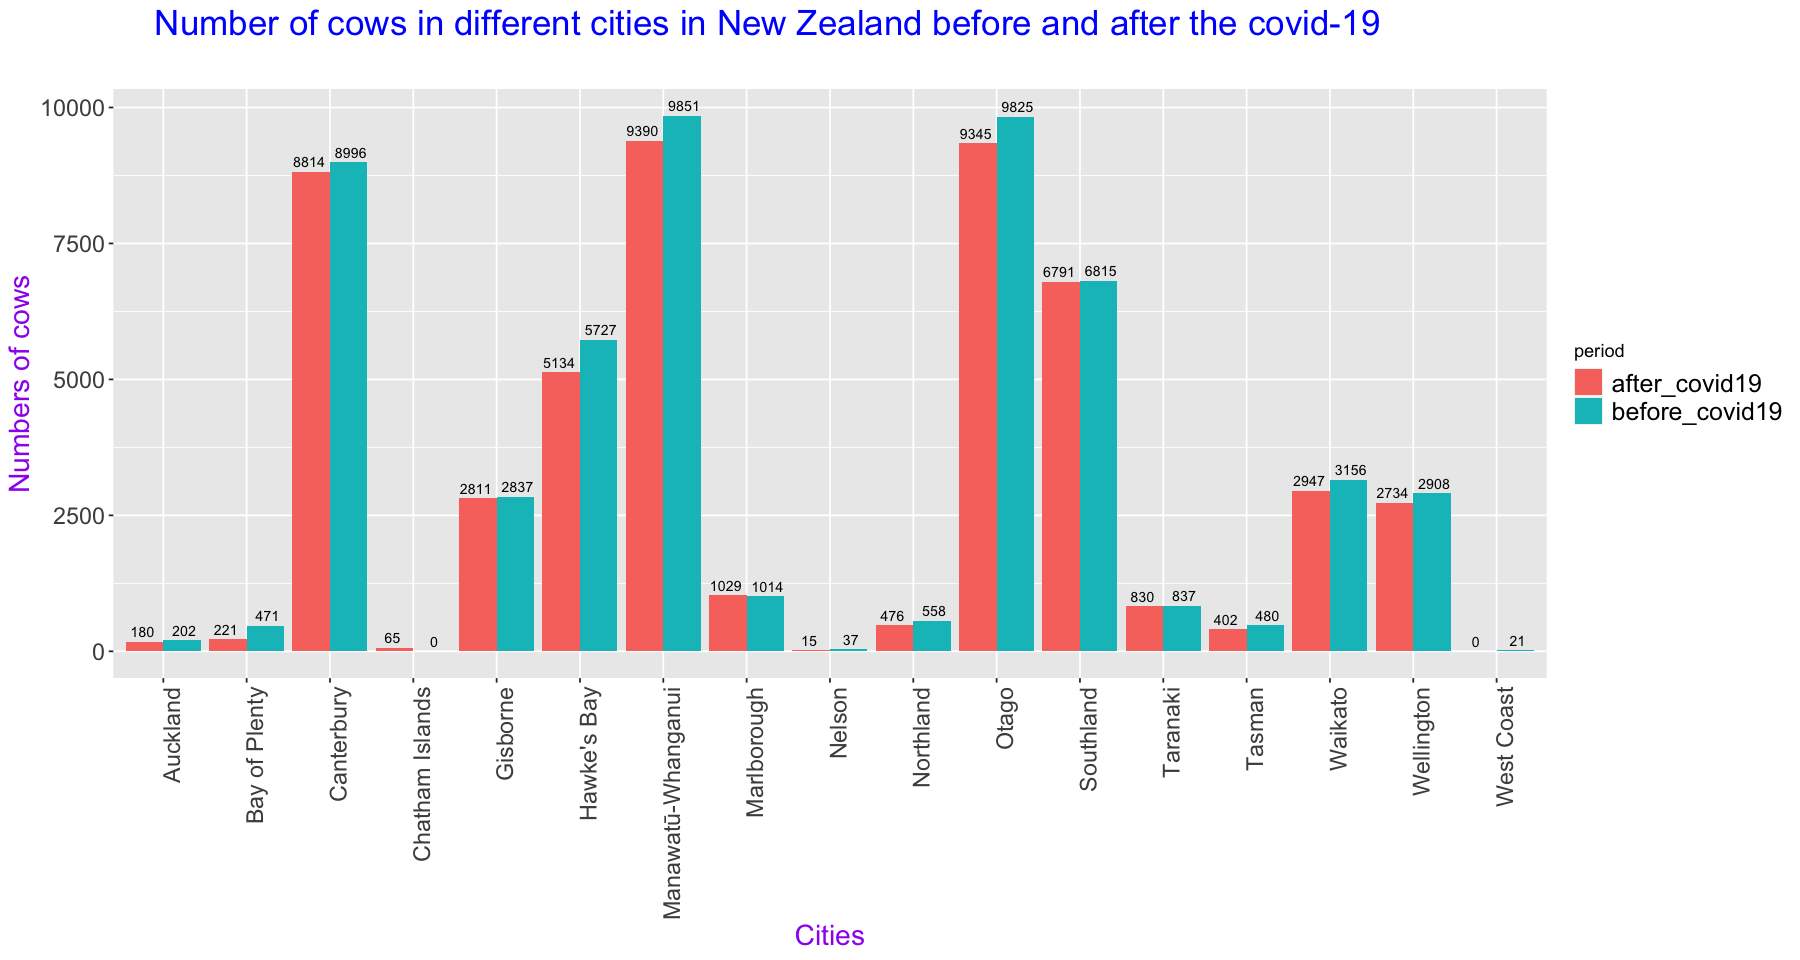

In [76]:
data_cow_comp_graph <- ggplot(data =compare_before_after_cow,
  mapping = aes(
    x = district, 
    y = number,
    fill = period))
data_sheep_comp_graph + geom_col(position = "dodge") + 
ggtitle("Number of cows in different cities in New Zealand before and after the covid-19
") + # title of the plot
geom_text(aes(label = number),position=position_dodge(width = 1),size = 3,vjust = -0.5)+
    theme(plot.title = element_text(size=21,hjust=0.2,color= "blue"), # set size of title
        axis.title = element_text(size=17,color = "purple"), # set size of x-axis and y-axis title
        axis.text.x = element_text(size=14,angle = 90, # set size of x-axis variable
        hjust = 1
        ),
        axis.text.y = element_text(size=14, # set size of x-axis variable
        hjust = 1
        ),
        legend.text = element_text(size = 15, face = "plain"))+ #mark the value on the top of each column
    xlab("Cities") + # set the x-axis title
    ylab("Numbers of cows") 
    

In [77]:
data_beef_before_covid <- livestock_2018_1[,c(1,6,7)]
data_beef_before_covid <- data_beef_before_covid %>% slice(-10,-19,-20)
colnames(data_beef_before_covid) <- (c("district", "beef2018","beef2019"))
data_beef_before_covid


district,beef2018,beef2019
<chr>,<dbl>,<dbl>
Northland,400,382
Auckland,114,118
Waikato,517,547
Bay of Plenty,96,107
Gisborne,261,254
Hawke's Bay,429,449
Taranaki,116,125
Manawat<U+016B>-Whanganui,554,575
Wellington,132,150


In [78]:

data_beef_before_covid<-mutate(data_beef_before_covid, number =beef2018+beef2019, period = "before_covid19") %>%
    select(-beef2018,-beef2019)
  

data_beef_before_covid

district,number,period
<chr>,<dbl>,<chr>
Northland,782,before_covid19
Auckland,232,before_covid19
Waikato,1064,before_covid19
Bay of Plenty,203,before_covid19
Gisborne,515,before_covid19
Hawke's Bay,878,before_covid19
Taranaki,241,before_covid19
Manawat<U+016B>-Whanganui,1129,before_covid19
Wellington,282,before_covid19


In [79]:
data_beef_after_covid <- livestock_2020_1[,c(1,4,5)] 
data_beef_after_covid <- data_beef_after_covid %>% slice(-10,-19,-20) 
colnames(data_beef_after_covid) <- (c("district", "beef2020","beef2021")) 
data_beef_after_covid

district,beef2020,beef2021
<chr>,<dbl>,<dbl>
Northland,311,311
Auckland,123,85
Waikato,1767,1810
Bay of Plenty,295,313
Gisborne,0,10
Hawke's Bay,0,72
Taranaki,555,538
Manawat<U+016B>-Whanganui,437,444
Wellington,100,93


In [80]:
data_beef_after_covid<-mutate(data_beef_after_covid, number =beef2020+beef2021, period = "after_covid19") %>%
    select(-beef2020,-beef2021)
  

data_beef_after_covid

district,number,period
<chr>,<dbl>,<chr>
Northland,622,after_covid19
Auckland,208,after_covid19
Waikato,3577,after_covid19
Bay of Plenty,608,after_covid19
Gisborne,10,after_covid19
Hawke's Bay,72,after_covid19
Taranaki,1093,after_covid19
Manawat<U+016B>-Whanganui,881,after_covid19
Wellington,193,after_covid19


In [81]:
compare_before_after_beef =rbind(data_beef_after_covid,data_beef_before_covid)
compare_before_after_beef

district,number,period
<chr>,<dbl>,<chr>
Northland,622,after_covid19
Auckland,208,after_covid19
Waikato,3577,after_covid19
Bay of Plenty,608,after_covid19
Gisborne,10,after_covid19
Hawke's Bay,72,after_covid19
Taranaki,1093,after_covid19
Manawat<U+016B>-Whanganui,881,after_covid19
Wellington,193,after_covid19


In [82]:
options(repr.plot.width=15, repr.plot.height=8)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab

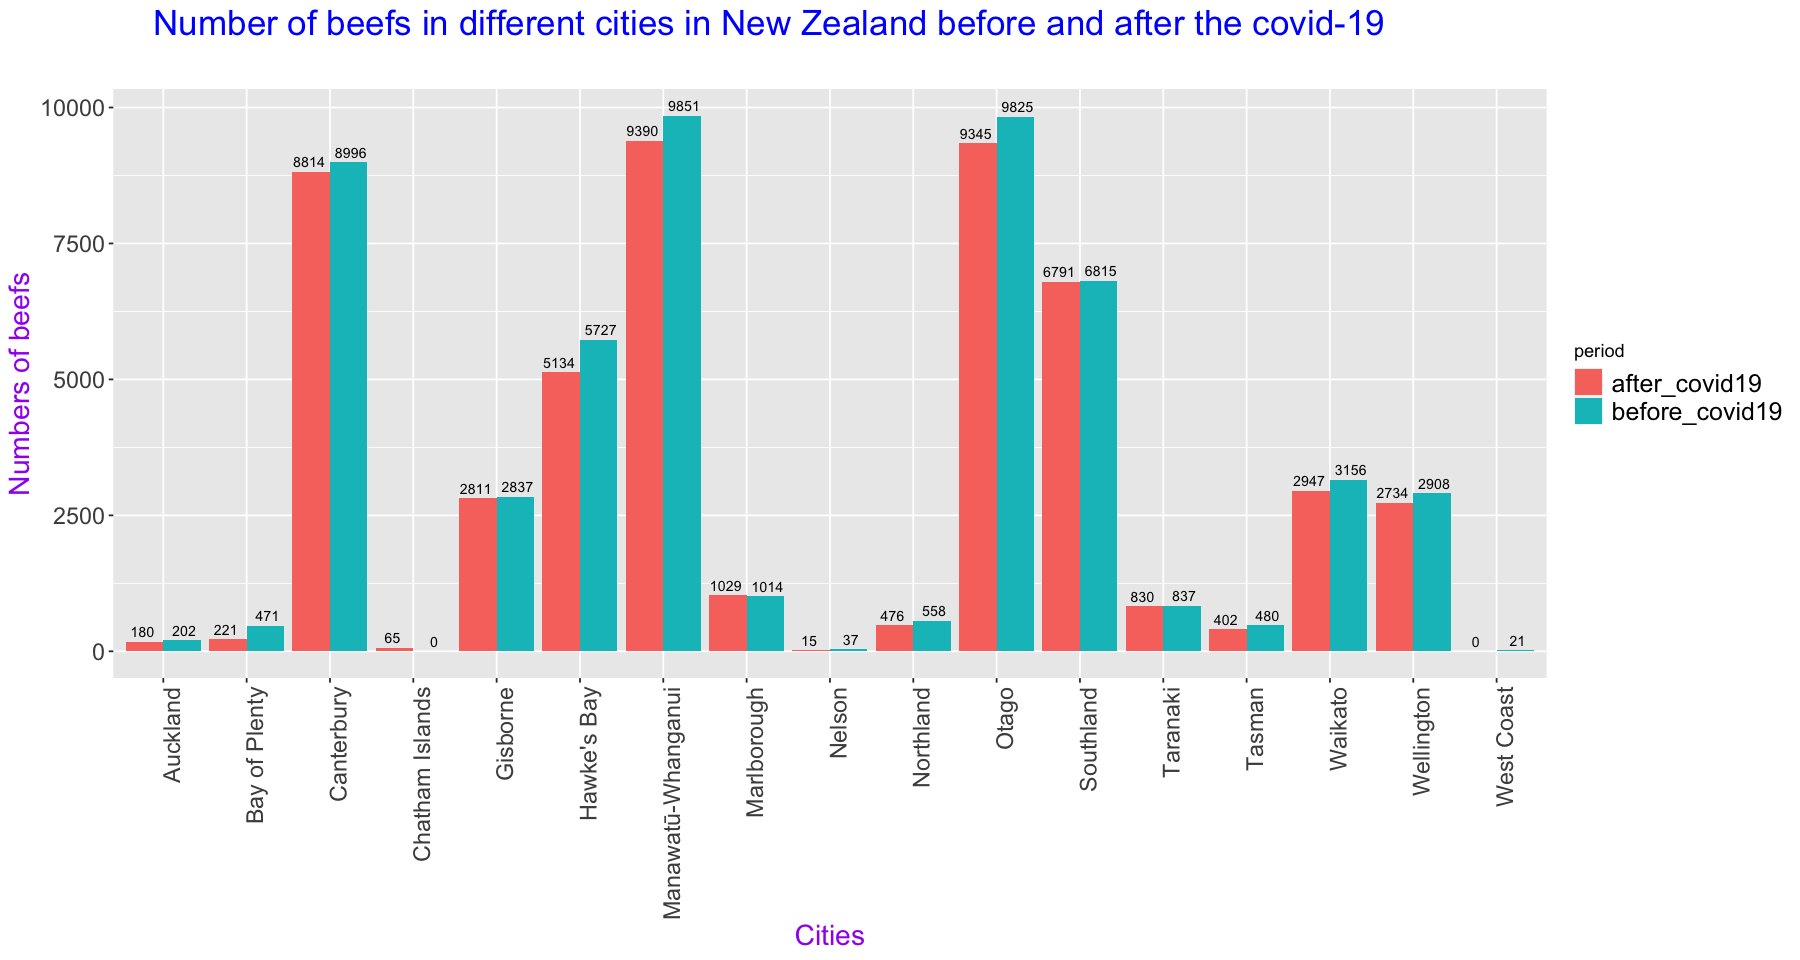

In [83]:
data_beef_comp_graph <- ggplot(data =compare_before_after_beef,
  mapping = aes(
    x = district, 
    y = number,
    fill = period))
data_sheep_comp_graph + geom_col(position = "dodge") + 
ggtitle("Number of beefs in different cities in New Zealand before and after the covid-19
") + # title of the plot
geom_text(aes(label = number),position=position_dodge(width = 1),size = 3,vjust = -0.5)+
    theme(plot.title = element_text(size=21,hjust=0.2,color= "blue"), # set size of title
        axis.title = element_text(size=17,color = "purple"), # set size of x-axis and y-axis title
        axis.text.x = element_text(size=14,angle = 90, # set size of x-axis variable
        hjust = 1
        ),
        axis.text.y = element_text(size=14, # set size of x-axis variable
        hjust = 1
        ),
        legend.text = element_text(size = 15, face = "plain"))+ #mark the value on the top of each column
    xlab("Cities") + # set the x-axis title
    ylab("Numbers of beefs") 
    

In [85]:
data_deer_before_covid <- livestock_2018_1[,c(1,8,9)]
data_deer_before_covid <- data_deer_before_covid %>% slice(-10,-19,-20)
colnames(data_deer_before_covid) <- (c("district", "deer2018","deer2019"))
data_deer_before_covid


district,deer2018,deer2019
<chr>,<dbl>,<dbl>
Northland,4,0
Auckland,11,9
Waikato,67,67
Bay of Plenty,37,0
Gisborne,0,0
Hawke's Bay,56,61
Taranaki,3,3
Manawat<U+016B>-Whanganui,56,51
Wellington,0,8


In [86]:
data_deer_before_covid<-mutate(data_deer_before_covid, number =deer2018+deer2019, period = "before_covid19") %>%
    select(-deer2018,-deer2019)
  

data_deer_before_covid


district,number,period
<chr>,<dbl>,<chr>
Northland,4,before_covid19
Auckland,20,before_covid19
Waikato,134,before_covid19
Bay of Plenty,37,before_covid19
Gisborne,0,before_covid19
Hawke's Bay,117,before_covid19
Taranaki,6,before_covid19
Manawat<U+016B>-Whanganui,107,before_covid19
Wellington,8,before_covid19


In [87]:
data_deer_after_covid <- livestock_2020_1[,c(1,8,9)] 
data_deer_after_covid <- data_deer_after_covid %>% slice(-10,-19,-20) 
colnames(data_deer_after_covid) <- (c("district", "deer2020","deer2021")) 
data_deer_after_covid

district,deer2020,deer2021
<chr>,<dbl>,<dbl>
Northland,0,0
Auckland,0,6
Waikato,70,64
Bay of Plenty,37,0
Gisborne,0,0
Hawke's Bay,67,60
Taranaki,3,2
Manawat<U+016B>-Whanganui,50,47
Wellington,0,0


In [88]:
data_deer_after_covid<-mutate(data_deer_after_covid, number =deer2020+deer2021, period = "after_covid19") %>%
    select(-deer2020,-deer2021)
  

data_deer_after_covid

district,number,period
<chr>,<dbl>,<chr>
Northland,0,after_covid19
Auckland,6,after_covid19
Waikato,134,after_covid19
Bay of Plenty,37,after_covid19
Gisborne,0,after_covid19
Hawke's Bay,127,after_covid19
Taranaki,5,after_covid19
Manawat<U+016B>-Whanganui,97,after_covid19
Wellington,0,after_covid19


In [89]:
compare_before_after_deer =rbind(data_deer_after_covid,data_deer_before_covid)
compare_before_after_deer

district,number,period
<chr>,<dbl>,<chr>
Northland,0,after_covid19
Auckland,6,after_covid19
Waikato,134,after_covid19
Bay of Plenty,37,after_covid19
Gisborne,0,after_covid19
Hawke's Bay,127,after_covid19
Taranaki,5,after_covid19
Manawat<U+016B>-Whanganui,97,after_covid19
Wellington,0,after_covid19


In [90]:
options(repr.plot.width=15, repr.plot.height=8)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <ab>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab>-Whanganui' in 'mbcsToSbcs': dot substituted for <c5>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Manawat<c5><ab

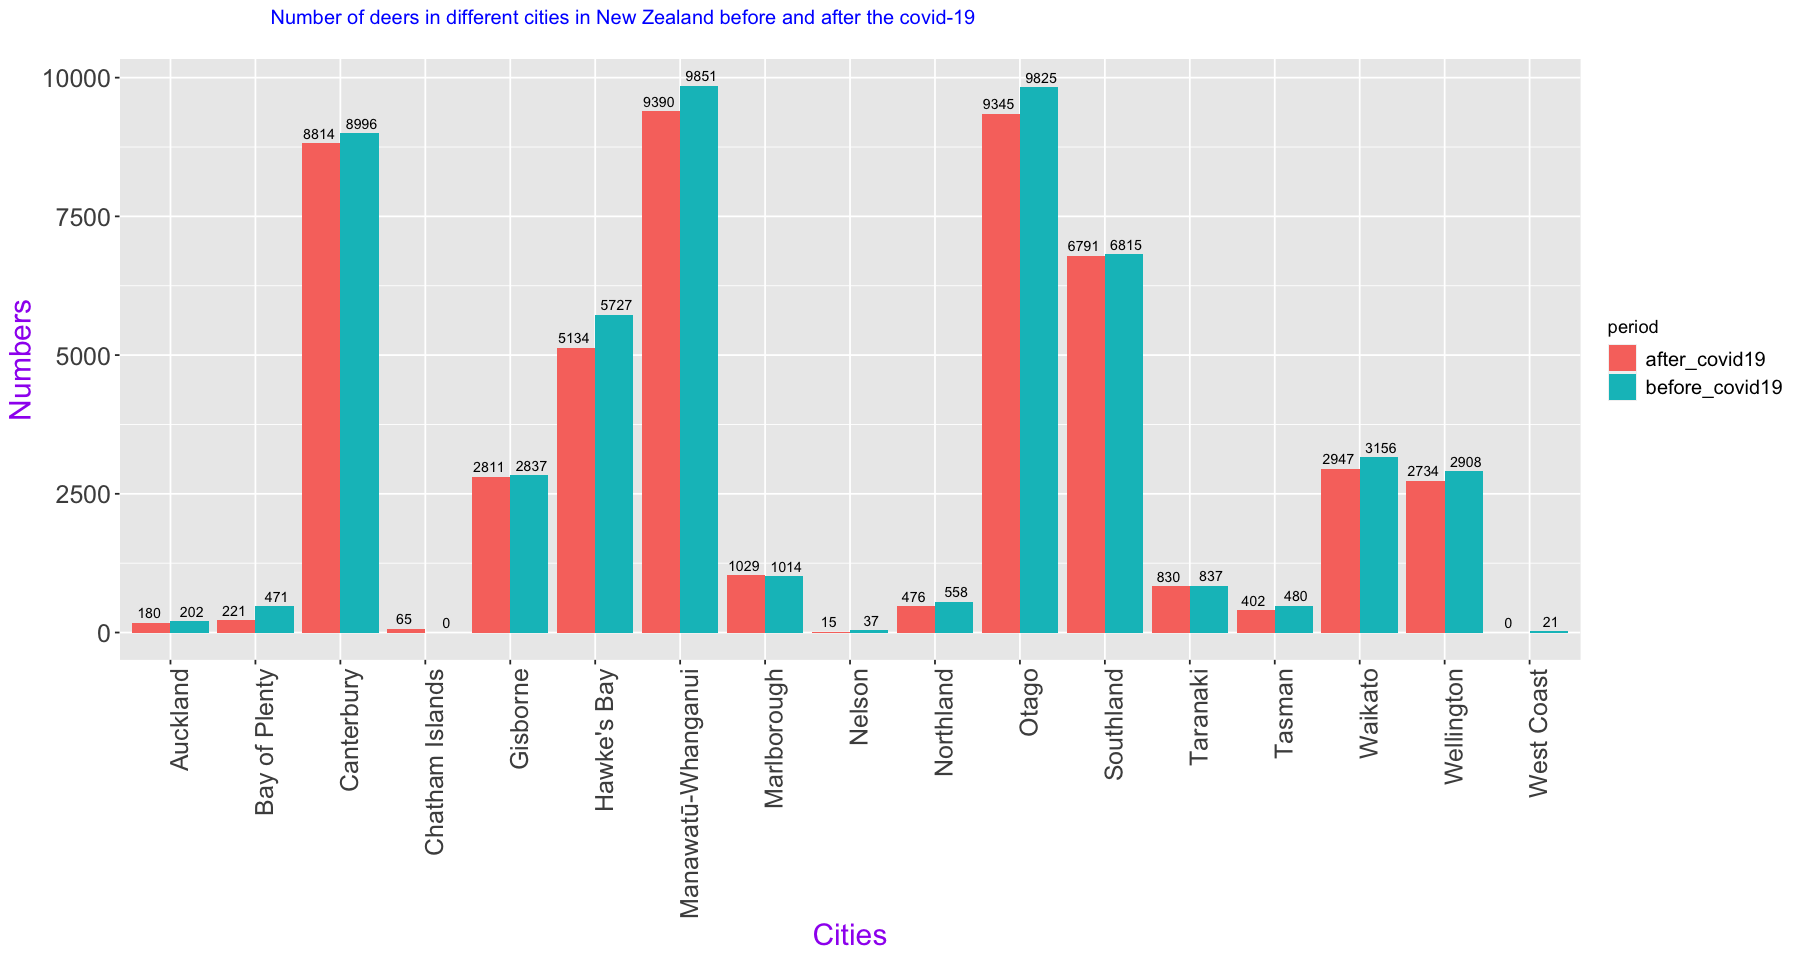

In [55]:
data_deer_comp_graph <- ggplot(data =compare_before_after_deer,
  mapping = aes(
    x = district, 
    y = number,
    fill = period))
data_sheep_comp_graph + geom_col(position = "dodge") + 
ggtitle("Number of deers in different cities in New Zealand before and after the covid-19
") + # title of the plot
geom_text(aes(label = number),position=position_dodge(width = 1),size = 3,vjust = -0.5)+
    theme(plot.title = element_text(size=21,hjust=0.2,color= "blue"), # set size of title
        axis.title = element_text(size=17,color = "purple"), # set size of x-axis and y-axis title
        axis.text.x = element_text(size=14,angle = 90, # set size of x-axis variable
        hjust = 1
        ),
        axis.text.y = element_text(size=14, # set size of x-axis variable
        hjust = 1
        ),
        legend.text = element_text(size = 15, face = "plain"))+ #mark the value on the top of each column
    xlab("Cities") + # set the x-axis title
    ylab("Numbers of deers") 
    